## Нейросети - основы.
### Ноутбук составлен по воспоминаниям из разных курсов

Попробуем сделать нейрон. n входов, 1 выход, от n входов сигнал передается с весами w, в самом нейроне действует функция активации, работающая с суммой сигналов от входов. Для начала воспользуемся классической сигмоидой. 

Пока без numpy, на чистом python

In [18]:
import math

In [24]:
def sigm(x):
    return 1 / (1 + math.exp(-x))

In [25]:
import matplotlib.pyplot as plt

In [26]:
X = [x for x in range(-10, 10)]

In [27]:
Y = [sigm(x) for x in X]

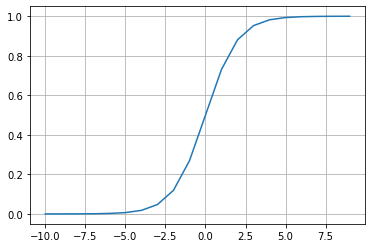

In [29]:
plt.plot(X, Y)
plt.grid()
plt.show()

In [55]:
class Neuron:
    
    def __init__(self, n, activation):
        self.w = [0.5 for i in range(n)] # будем пока пользоваться статической инициализацией весов
        self.act = activation
        
    def forward(self, X):
        result = 0
        for x, w in zip(X, self.w):
            result += x*w
        return self.act(result)

Пусть будет 2 признака, подаваемыми на вход нейрону

In [59]:
X = [-4, 4]

In [60]:
N1 = Neuron(2, sigm)

In [61]:
N1.forward(X)

0.5

В направлении forward работает - теперь нейрон нужно обучить. Пользуемся методом обратного распространения ошибки. Возьмем задачу классификации и логистическую функци потерь:

In [130]:
def logloss(y, y_hat):
    eps = 1e-10
    return -y*math.log(y_hat + eps, 2) - (1 - y)*math.log(1 - y_hat + eps, 2)

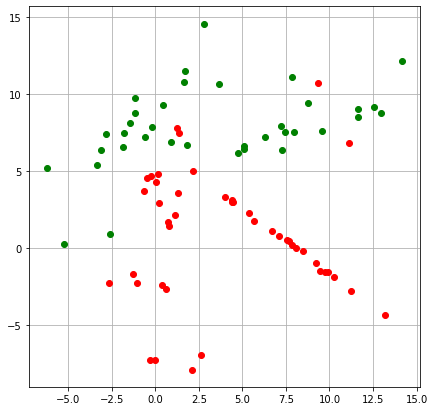

In [292]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np

X, Y = make_classification(n_samples=100, n_features=2, 
                           n_informative=2, n_classes=2, 
                           n_redundant=0,
                           n_clusters_per_class=2,
                           scale = 4,
                           shift = 1,
                           flip_y = 0.1,
                           random_state = 4)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=20, random_state = 42)

fig = plt.figure(figsize=(7, 7))

plt.plot(X_train[np.where(Y_train==0), 0], X_train[np.where(Y_train==0), 1], 'ro')
plt.plot(X_train[np.where(Y_train==1), 0], X_train[np.where(Y_train==1), 1], 'go')
plt.grid()

plt.show()

Посмотрим, как выглядит функция ошибки в зависимости от весов w1 и w2

In [293]:
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

/tmp/ipykernel_24723/1452060415.py:21: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = Axes3D(fig)


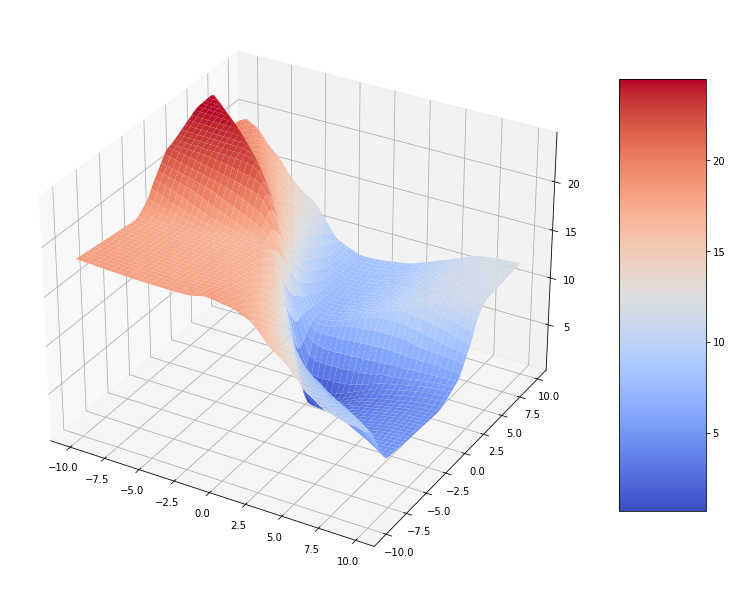

In [294]:
def makeData(X_train, Y_train):
    W1 = np.arange (-10, 10, 0.2)
    W2 = np.arange (-10, 10, 0.2)
    w1grid, w2grid = np.meshgrid(W1, W2)
    
    lossgrid = np.zeros((len(W1), len(W2)))
    for i, w1 in enumerate(W1):
        for j, w2 in enumerate(W2):
            N = Neuron(2, sigm)
            N.w = [w1, w2]
            result = []
            for x, y in zip(X_test, Y_test):
                y_hat = N.forward(x)
                result.append(logloss(y, y_hat))
            lossgrid[i, j] = np.array(result).mean()

    return w1grid, w2grid, lossgrid

x, y, U = makeData(X_train, Y_train)
fig = pylab.figure(figsize=(10, 12))
axes = Axes3D(fig)
surf = axes.plot_surface(x, y, U, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)
# axes.plot_wireframe(x, y, U)
pylab.show()